### 모델링 진행

In [1]:
from tree_modeling import *
from scaling import *

import pandas as pd

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv("../../데이터/preprocessed data/20240120_preprocessed_modeling_data.csv", converters={"ID" : str})

In [6]:
# num_cols = ['바종설_성적', '1학년_취득성적', '2학년_취득성적', '3학년_취득성적',
#        '4학년_취득성적', '전진탐_이수횟수',
#        '기업현장실습_이수_학점', '진로상담_참여횟수', '취업상담_참여횟수', '진로탐색및설계_참여횟수', '직무탐색_참여횟수',
#        '역량강화_참여횟수', '취업실전_참여횟수', '교내장학금_누적금액',
#        '교외장학금_누적금액', '국가장학금_누적금액', '동아리참여학기', '소학회참여학기', '해외경험_기간', '총이수학기',
#        '취업유무']

num_cols = ['전체성적', '전진탐_이수횟수',
       '기업현장실습_이수_학점', '진로상담_참여횟수', '취업상담_참여횟수', '진로탐색및설계_참여횟수', '직무탐색_참여횟수',
       '역량강화_참여횟수', '취업실전_참여횟수', '교내장학금_누적금액',
       '교외장학금_누적금액', '국가장학금_누적금액', '동아리참여학기', '소학회참여학기', '해외경험_기간',
       '취업유무']

In [7]:
## vif 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = num_cols[:-1]
vif["VIF Factor"] = [variance_inflation_factor(df[num_cols[:-1]].values, i) for i in range(df[num_cols[:-1]].shape[1])]
vif.round(1) # 실수부 1번째자리까지 표현하도록

In [8]:
## 간단하게 로지스틱 회귀 실행
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

title = "Logistic Regression"
scale = "MinMax"
lr_df = df[num_cols]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# valid, test split
X = lr_df.drop(labels=["취업유무"], axis=1)
y = lr_df["취업유무"]

# X_resample, y_resample = ClusterCentroids(random_state=42).fit_resample(X, y)

# input에 맞게 scaler 적용 -> 스케일링 X
scaled_X = scaling.scaler(MinMaxScaler(), X) if scale == "MinMax" else scaling.scaler(StandardScaler(), X)

# scaled_X
X_valid, X_test, y_valid, y_test = train_test_split(scaled_X, y, stratify=y, test_size=0.2, random_state=rs)


# 로지스틱 회귀 모델 생성
model = LogisticRegression()

for train_index, test_index in skf.split(X_valid, y_valid):
    X_train = X_valid[train_index]
    y_train = y_valid.iloc[train_index]

    model.fit(X_train, y_train)

# 모델 학습
model.fit(X_valid, y_valid)

# 모델 학습 결과
y_valid_pred = model.predict(X_valid)
y_pred = model.predict(X_test)

train_acc = accuracy_score(y_valid, y_valid_pred)
test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.3f}") # 정확도
print(f"Test Accuracy: {test_acc:.3f}") # 정확도
print(f"Precision: {precision:.3f}") # 정밀도
print(f"Recall: {recall:.3f}") # 재현율
print(f"F1-score: {f1:.3f}") # F1 스코어

# confusion-matrix plot
visualization_confusion_matrix(y_valid, y_valid_pred, title + "_valid")
visualization_confusion_matrix(y_test, y_pred, title + "_test")

# 결과를 DataFrame으로 변환
coefficients_df = pd.DataFrame({'Variable': num_cols[:-1], 'Coefficient': model.coef_[0]})
coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

In [9]:
cat_cols = ['수시', '정시',
       '기업직무분석과취업준비_수강여부', '대학생활과진로탐색_수강여부', '취업실전워크숍_수강여부', '리더십워크샵_수강여부',
       '부전공_이수여부', '2전공_이수여부', '행정학사', '문학사', '체육학사', '경영학사', '이학사', '원예학사',
       '경제학사', '공학사', '미술학사', '디자인학사', '글로벌문화학사', '조경학사', '공학사(경영공학)', '취업유무']

In [10]:
# cols = ['수시', '정시', '바종설_성적', '1학년_취득성적', '2학년_취득성적', '3학년_취득성적',
#        '4학년_취득성적', '전진탐_이수횟수',
#        '기업직무분석과취업준비_수강여부', '대학생활과진로탐색_수강여부', '취업실전워크숍_수강여부', '리더십워크샵_수강여부',
#        '기업현장실습_이수_학점', '진로상담_참여횟수', '취업상담_참여횟수', '진로탐색및설계_참여횟수', '직무탐색_참여횟수',
#        '역량강화_참여횟수', '취업실전_참여횟수', '교내장학금_누적금액',
#        '교외장학금_누적금액', '국가장학금_누적금액', '동아리참여학기', '소학회참여학기', '해외경험_기간', '총이수학기',
#        '부전공_이수여부', '2전공_이수여부', '행정학사', '문학사', '체육학사', '경영학사', '이학사', '원예학사',
#        '경제학사', '공학사', '미술학사', '디자인학사', '글로벌문화학사', '조경학사', '공학사(경영공학)', '취업유무']

cols = ['정시', '바종설_성적', '전체성적', '전진탐_이수횟수',
       '기업직무분석과취업준비_수강여부', '대학생활과진로탐색_수강여부', '취업실전워크숍_수강여부', '리더십워크샵_수강여부',
       '기업현장실습_이수_학점', '진로상담_참여횟수', '취업상담_참여횟수', '진로탐색및설계_참여횟수', '직무탐색_참여횟수',
       '역량강화_참여횟수', '취업실전_참여횟수', '교내장학금_누적금액',
       '교외장학금_누적금액', '국가장학금_누적금액', '동아리참여학기', '소학회참여학기', '해외경험_기간', '총이수학기',
       '부전공_이수여부', '2전공_이수여부', '행정학사', '문학사', '체육학사', '경영학사', '이학사', '원예학사',
       '경제학사', '공학사', '미술학사', '디자인학사', '글로벌문화학사', '조경학사', '공학사(경영공학)', '취업유무']

모델링 직전 컬럼명 변경
- 취업유무 -> 취업여부
- 정시 -> 입학전형
- 2전공_이수여부 -> 복수/연계전공_이수여부

In [13]:
df.rename(columns={"취업유무":"취업여부", "정시":"입학전형", "2전공_이수여부":"복수/연계전공_이수여부"}, inplace=True)

In [14]:
cols = ['입학전형', '바종설_성적', '전체성적', '전진탐_이수횟수',
       '기업직무분석과취업준비_수강여부', '대학생활과진로탐색_수강여부', '취업실전워크숍_수강여부', '리더십워크샵_수강여부',
       '기업현장실습_이수_학점', '진로상담_참여횟수', '취업상담_참여횟수', '진로탐색및설계_참여횟수', '직무탐색_참여횟수',
       '역량강화_참여횟수', '취업실전_참여횟수', '교내장학금_누적금액',
       '교외장학금_누적금액', '국가장학금_누적금액', '동아리참여학기', '소학회참여학기', '해외경험_기간', '총이수학기',
       '부전공_이수여부', '복수/연계전공_이수여부', '취업여부']

[ XGBoost cc filter X ]


c:\Users\mool8\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "do_es" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\mool8\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "do_es" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\mool8\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "do_es" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\mool8\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [2

- Train ----
Train Accuracy: 0.776
Precision: 0.753
Recall: 0.822
F1-score: 0.786


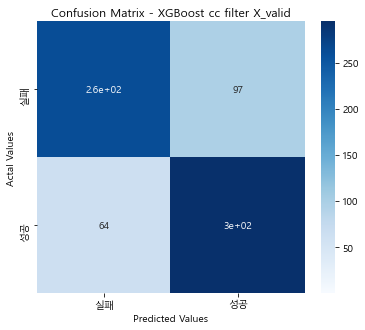


- Test ----
Test Accuracy: 0.739
Precision: 0.713
Recall: 0.800
F1-score: 0.754


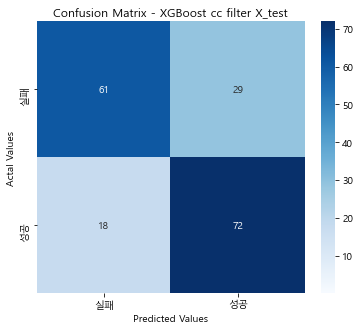

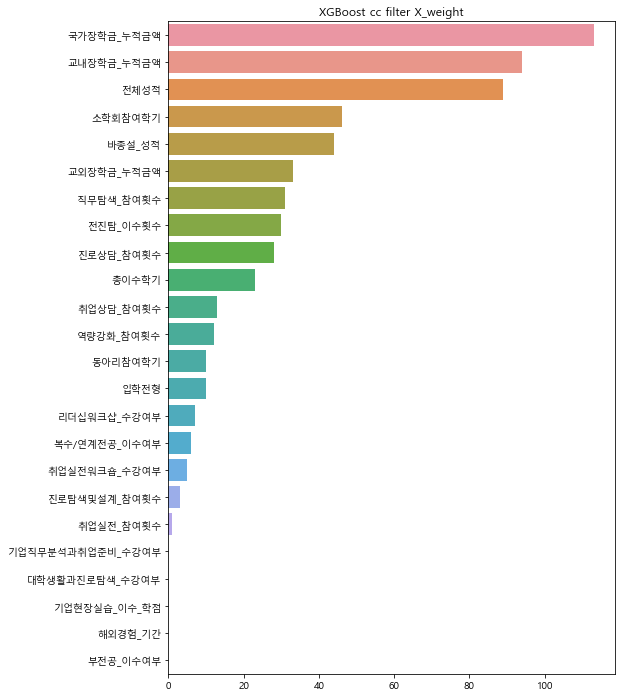

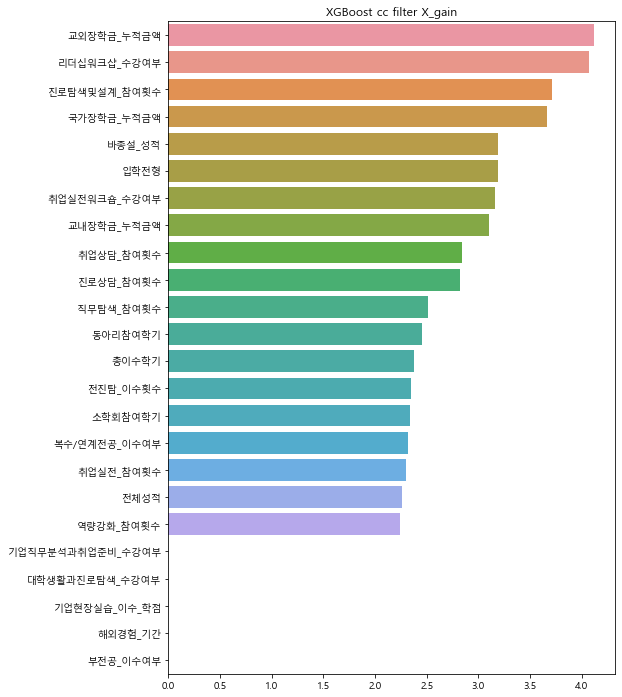

In [15]:
title = "XGBoost cc filter X"

param = {
    "max_depth" : 5,
    "max_leaves" : 25,
    "n_estimators" : 150,
    "learning_rate" : 0.1,
    "subsample" : 0.5,
    "min_child_weight" : 10,
    "colsample_bytree" : 0.5
}

model = tree_excution(df[cols], do_es = False, do_cv = True, title = title,**param)

[23:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


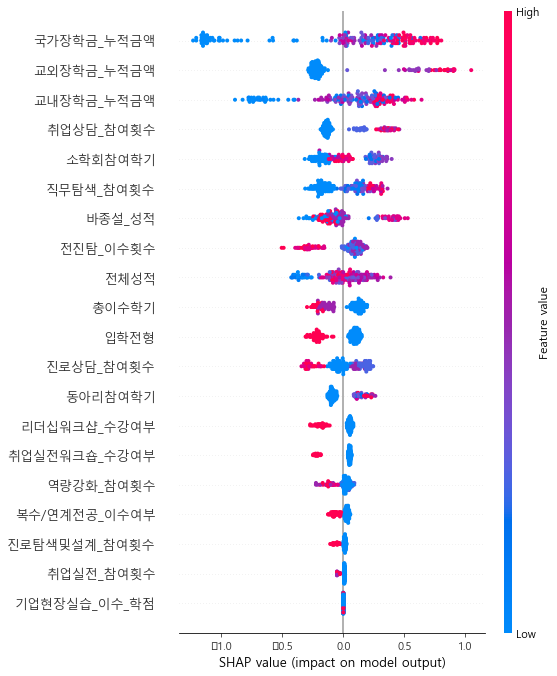

In [16]:
X_valid, X_test, y_valid, y_test = prepare_data(df[cols])

import shap

# 모델 설명자 생성
explainer = shap.Explainer(model)

# SHAP 값 계산
shap_values = explainer.shap_values(X_test)

# 특성 중요도 시각화
shap.summary_plot(shap_values, X_test)

[23:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


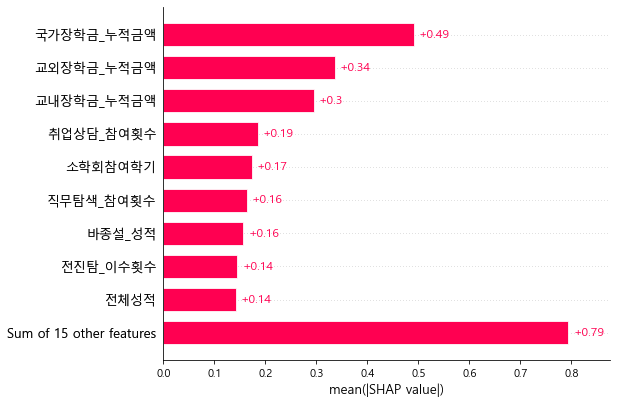

In [17]:
import shap

# 모델 설명자 생성
explainer = shap.Explainer(model)

# SHAP 값 계산
shap_values = explainer(X_test)

shap.plots.bar(shap_values)

[23:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Glyph 8722 missing from current font.
Glyph 8722 missing from current font.


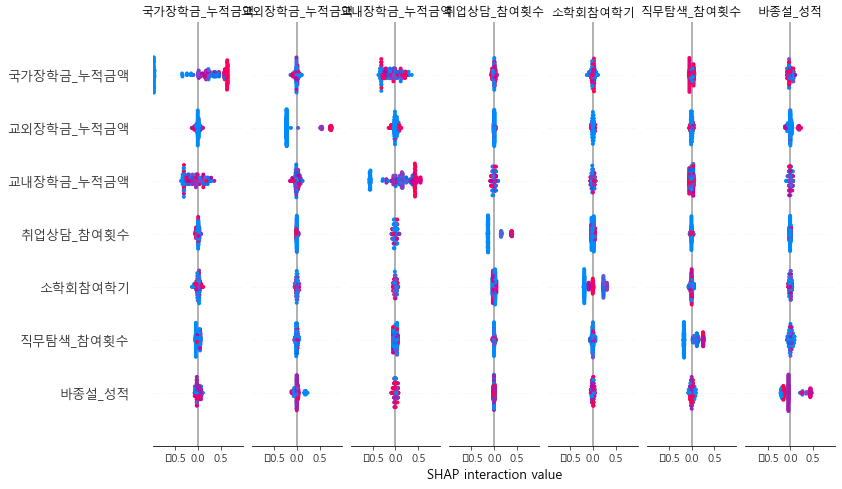

In [18]:
import shap

# 모델 설명자 생성
explainer = shap.Explainer(model)

# SHAP 값 계산
shap_values = explainer.shap_values(X_test)

# interaction values 계산
shap_interaction_values = explainer.shap_interaction_values(X_test)

# 특성 중요도 시각화
shap.summary_plot(shap_interaction_values, X_test)